In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Set display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
np.set_printoptions(precision=3)

print("✅ Libraries imported successfully")

✅ Libraries imported successfully


In [2]:
# Load the Titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# Display basic information about the dataset
print(f"Dataset shape: {df.shape} - {df.shape[0]} rows and {df.shape[1]} columns")
print("\nFirst 5 rows of the dataset:")
df.head()

Dataset shape: (891, 12) - 891 rows and 12 columns

First 5 rows of the dataset:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Check data types and missing values
print("Dataset information:")
df.info()

# Get statistical summary of numerical features
print("\nSummary statistics of numerical features:")
df.describe()

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Summary statistics of numerical features:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Missing values in the dataset:
          Missing Values  Missing Percentage
Age                  177               19.87
Cabin                687               77.10
Embarked               2                0.22


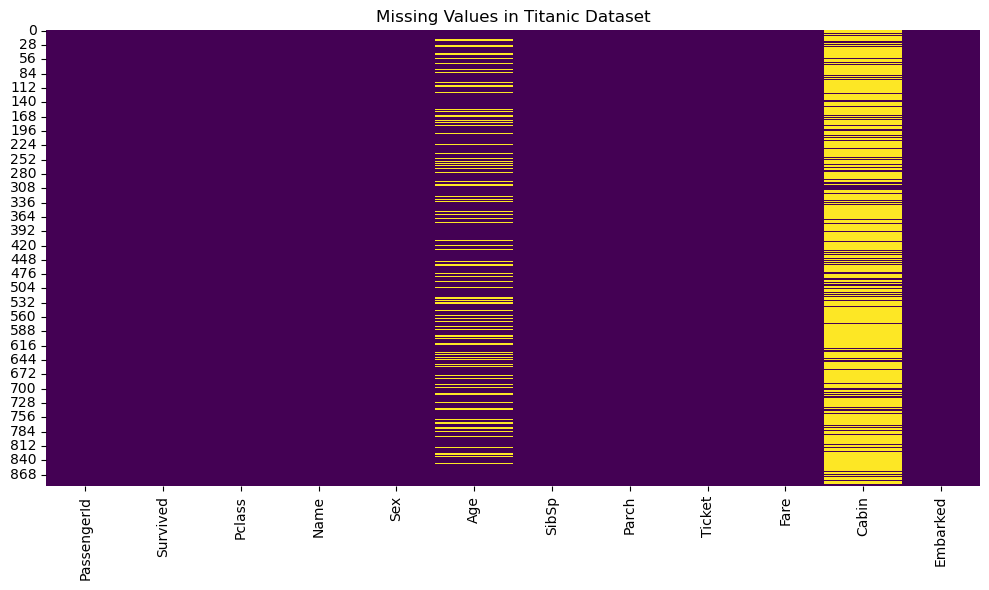


Missing value analysis:
- Age: Missing for about 20% of passengers
- Cabin: Missing for about 77% of passengers
- Embarked: Missing for less than 1% of passengers


In [4]:
# Check for missing values in each column
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

# Create a DataFrame to better visualize missing values
missing_info = pd.DataFrame({
    'Missing Values': missing_values,
    'Missing Percentage': missing_percentage.round(2)
})

print("Missing values in the dataset:")
print(missing_info[missing_info['Missing Values'] > 0])

# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Titanic Dataset')
plt.tight_layout()
plt.show()

# Explain the findings:
print("\nMissing value analysis:")
print("- Age: Missing for about 20% of passengers")
print("- Cabin: Missing for about 77% of passengers")
print("- Embarked: Missing for less than 1% of passengers")

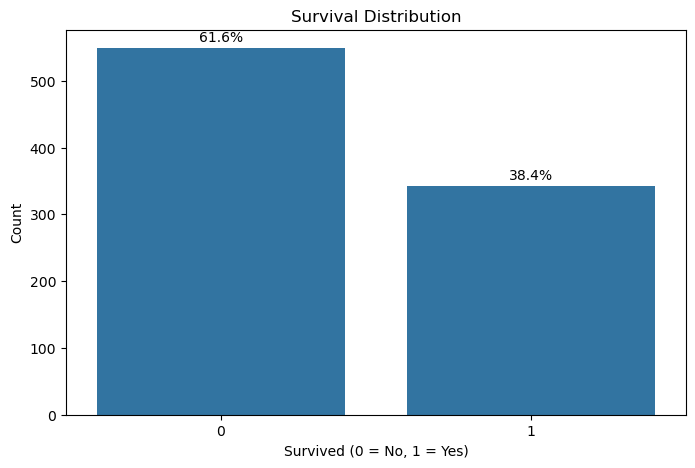

Overall survival rate: 38.38%


In [5]:
# Analyze the target variable (Survived)
plt.figure(figsize=(8, 5))
survival_counts = df['Survived'].value_counts()
sns.countplot(x='Survived', data=df)
plt.title('Survival Distribution')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')

# Add percentage labels
for i, count in enumerate(survival_counts):
    percentage = count / len(df) * 100
    plt.annotate(f'{percentage:.1f}%', 
                 xy=(i, count), 
                 xytext=(0, 5),
                 textcoords='offset points',
                 ha='center')

plt.show()

print(f"Overall survival rate: {df['Survived'].mean()*100:.2f}%")

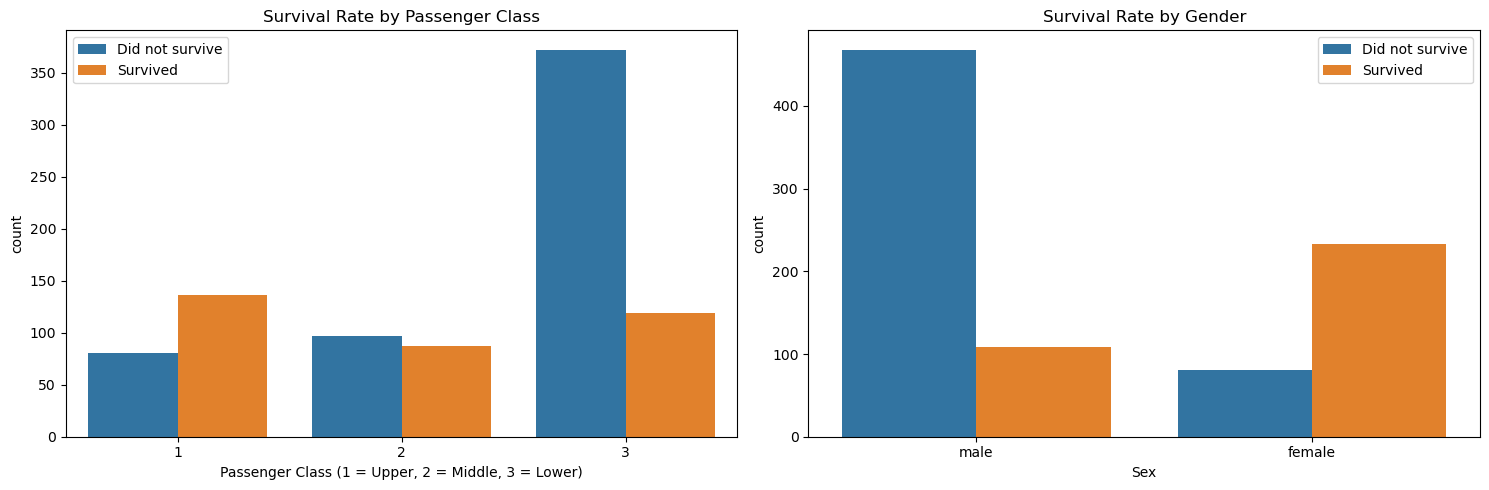

Survival rate by passenger class:
Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64

Survival rate by gender:
Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64

Observations:
- First class passengers had the highest survival rate
- Females had a much higher survival rate than males (almost 4x higher)


In [6]:
# Analyze survival rates by categorical features
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Survival by passenger class
sns.countplot(x='Pclass', hue='Survived', data=df, ax=axes[0])
axes[0].set_title('Survival Rate by Passenger Class')
axes[0].set_xlabel('Passenger Class (1 = Upper, 2 = Middle, 3 = Lower)')
axes[0].legend(['Did not survive', 'Survived'])

# Survival by gender
sns.countplot(x='Sex', hue='Survived', data=df, ax=axes[1])
axes[1].set_title('Survival Rate by Gender')
axes[1].legend(['Did not survive', 'Survived'])

plt.tight_layout()
plt.show()

# Display survival rates as percentages by class and gender
print("Survival rate by passenger class:")
print(df.groupby('Pclass')['Survived'].mean().sort_values(ascending=False) * 100)

print("\nSurvival rate by gender:")
print(df.groupby('Sex')['Survived'].mean() * 100)

print("\nObservations:")
print("- First class passengers had the highest survival rate")
print("- Females had a much higher survival rate than males (almost 4x higher)")

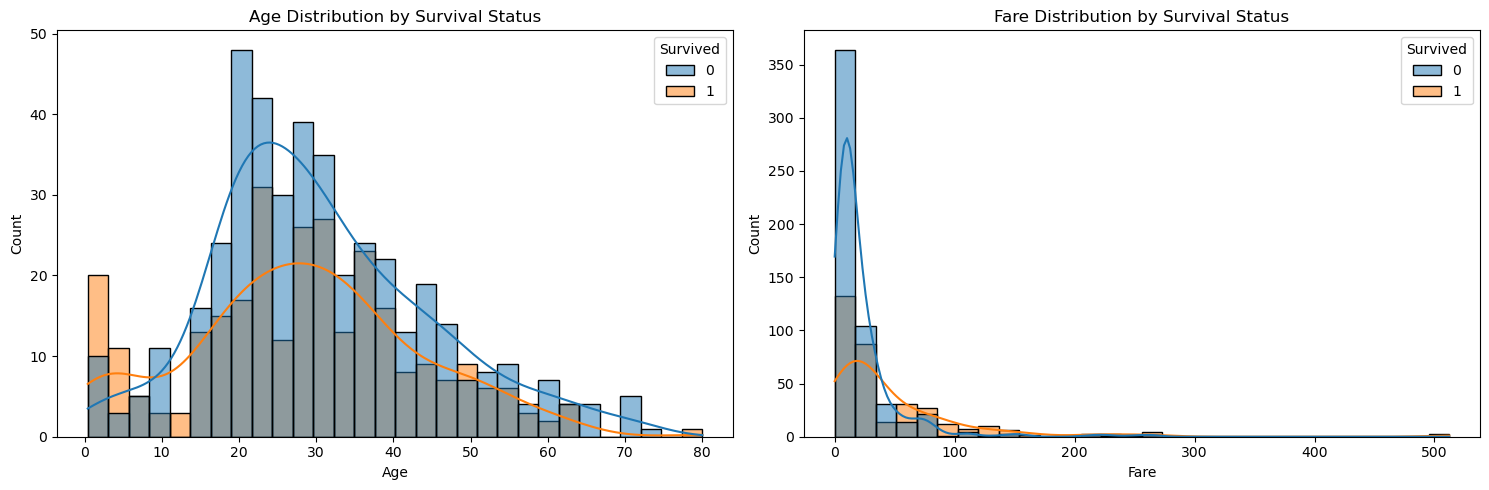

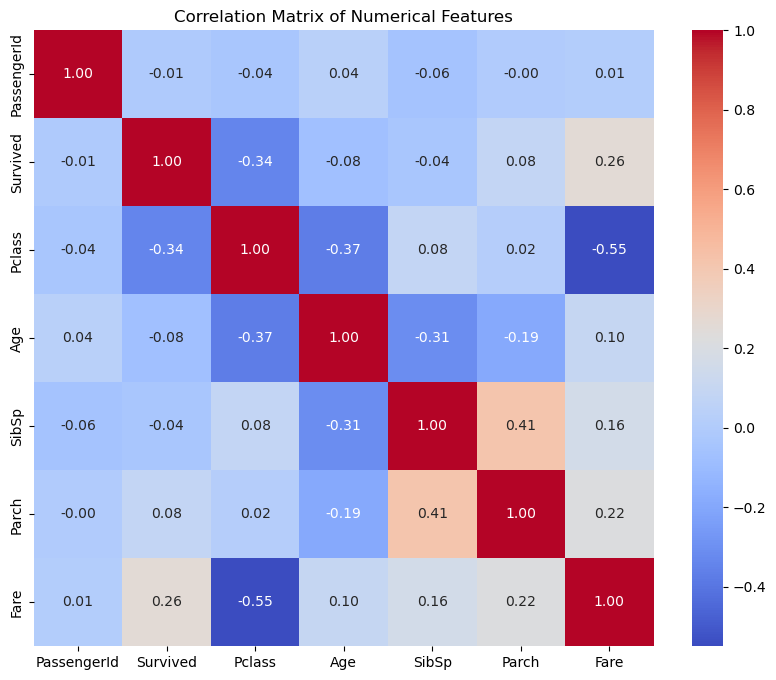

Observations from correlation matrix:
- Fare has a positive correlation with survival (0.26)
- Pclass has a negative correlation with survival (-0.34)
- Age has a slight negative correlation with survival (-0.07)


In [7]:
# Analyze numerical features: Age and Fare
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Age distribution by survival status
sns.histplot(data=df, x='Age', hue='Survived', kde=True, bins=30, ax=axes[0])
axes[0].set_title('Age Distribution by Survival Status')

# Fare distribution by survival status
sns.histplot(data=df, x='Fare', hue='Survived', kde=True, bins=30, ax=axes[1])
axes[1].set_title('Fare Distribution by Survival Status')

plt.tight_layout()
plt.show()

# Create correlation matrix for numerical features
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

print("Observations from correlation matrix:")
print("- Fare has a positive correlation with survival (0.26)")
print("- Pclass has a negative correlation with survival (-0.34)")
print("- Age has a slight negative correlation with survival (-0.07)")

In [8]:
# Create a copy of the original DataFrame to preserve it
df_clean = df.copy()

print("Creating a clean working copy of the data.")
print("This prevents modifying the original data and allows us to revert if needed.")
print(f"Shape of working DataFrame: {df_clean.shape}")

Creating a clean working copy of the data.
This prevents modifying the original data and allows us to revert if needed.
Shape of working DataFrame: (891, 12)


Missing values in Age column: 177 (19.87%)


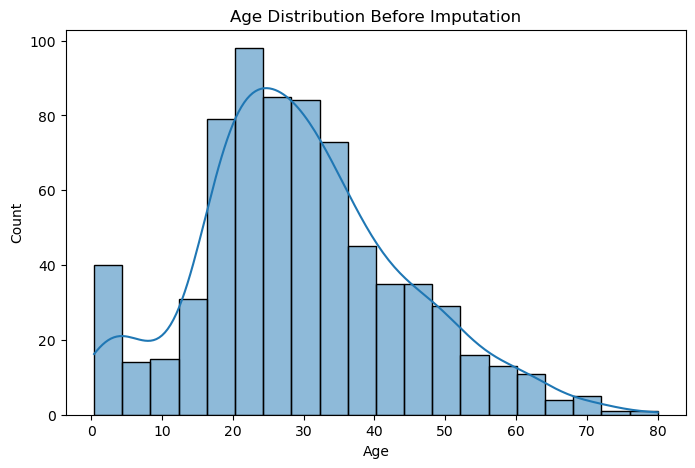

Missing values in Age column after imputation: 0


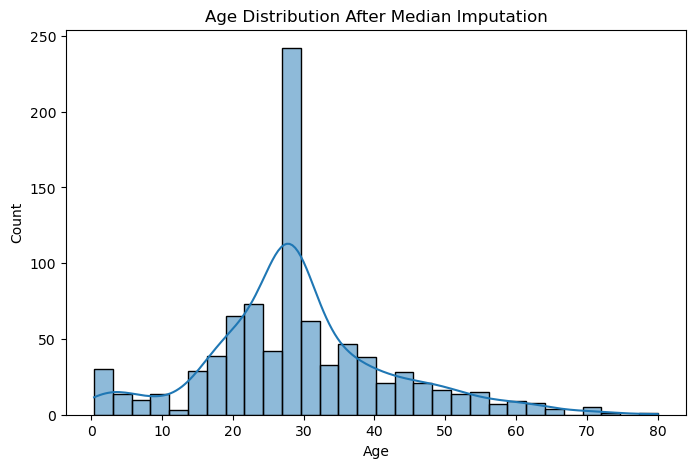

Median age used for imputation: 28.00

Note: We used median imputation because age data might have outliers (very young or old passengers).
Median is more robust to outliers compared to mean.


In [9]:
# Handle missing values in Age
print(f"Missing values in Age column: {df_clean['Age'].isnull().sum()} ({df_clean['Age'].isnull().sum() / len(df_clean) * 100:.2f}%)")

# Visualize Age distribution before imputation
plt.figure(figsize=(8, 5))
sns.histplot(df_clean['Age'].dropna(), kde=True)
plt.title('Age Distribution Before Imputation')
plt.show()

# Impute missing Age values with median
age_imputer = SimpleImputer(strategy='median')
df_clean['Age'] = age_imputer.fit_transform(df_clean[['Age']])

# Verify imputation worked
print(f"Missing values in Age column after imputation: {df_clean['Age'].isnull().sum()}")

# Visualize Age distribution after imputation
plt.figure(figsize=(8, 5))
sns.histplot(df_clean['Age'], kde=True)
plt.title('Age Distribution After Median Imputation')
plt.show()

print(f"Median age used for imputation: {age_imputer.statistics_[0]:.2f}")
print("\nNote: We used median imputation because age data might have outliers (very young or old passengers).")
print("Median is more robust to outliers compared to mean.")


Missing values in Embarked column: 2 (0.22%)


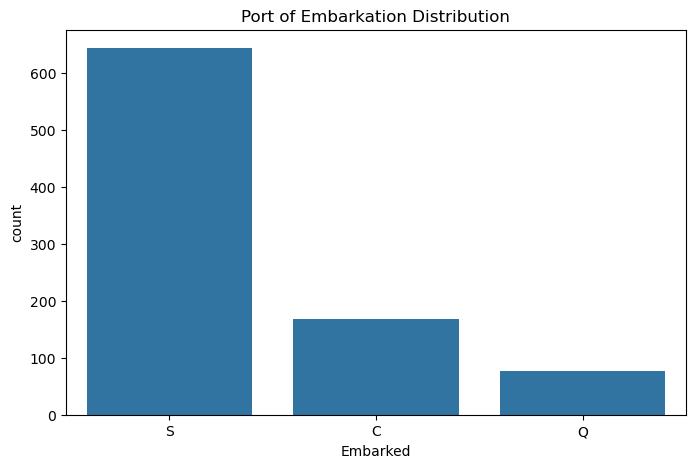

Most common embarkation port: S
Missing values in Embarked column after imputation: 0

Note: For categorical variables like 'Embarked', using the most frequent value (mode)
is a common imputation strategy, especially when the missing percentage is low.


In [10]:
# Handle missing values in Embarked column
print(f"Missing values in Embarked column: {df_clean['Embarked'].isnull().sum()} ({df_clean['Embarked'].isnull().sum() / len(df_clean) * 100:.2f}%)")

# Analyze Embarked distribution
plt.figure(figsize=(8, 5))
embarked_counts = df_clean['Embarked'].value_counts()
sns.countplot(x='Embarked', data=df_clean)
plt.title('Port of Embarkation Distribution')
plt.show()

print("Most common embarkation port:", df_clean['Embarked'].mode()[0])

# Impute missing Embarked values with most frequent value
embarked_imputer = SimpleImputer(strategy='most_frequent')
df_clean['Embarked'] = embarked_imputer.fit_transform(df_clean[['Embarked']]).ravel()

# Verify imputation worked
print(f"Missing values in Embarked column after imputation: {df_clean['Embarked'].isnull().sum()}")

print("\nNote: For categorical variables like 'Embarked', using the most frequent value (mode)")
print("is a common imputation strategy, especially when the missing percentage is low.")

In [11]:
# Handle missing values in Cabin column
print(f"Missing values in Cabin column: {df_clean['Cabin'].isnull().sum()} ({df_clean['Cabin'].isnull().sum() / len(df_clean) * 100:.2f}%)")

# Since a high percentage of Cabin values are missing, dropping the column is reasonable
df_clean.drop(columns=['Cabin'], inplace=True)

print("Cabin column dropped due to high percentage of missing values.")
print("When over 70% of values are missing, the information gain may not be worth the imputation effort.")

# Check for any remaining missing values
remaining_missing = df_clean.isnull().sum()
print("\nRemaining missing values after handling:")
print(remaining_missing[remaining_missing > 0])

Missing values in Cabin column: 687 (77.10%)
Cabin column dropped due to high percentage of missing values.
When over 70% of values are missing, the information gain may not be worth the imputation effort.

Remaining missing values after handling:
Series([], dtype: int64)


Creating new feature: 'FamilySize'


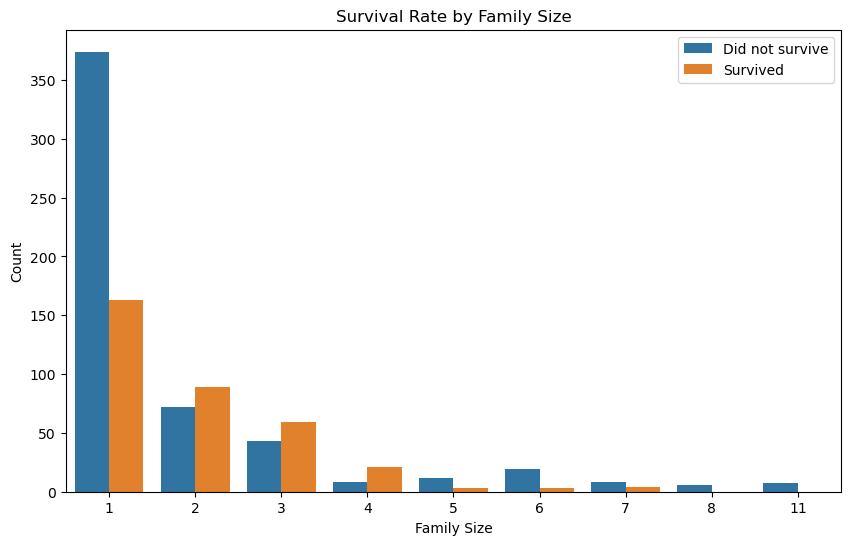

Survival rate by family size:
FamilySize
4     72.413793
3     57.843137
2     55.279503
7     33.333333
1     30.353818
5     20.000000
6     13.636364
8      0.000000
11     0.000000
Name: Survived, dtype: float64

Observation: Family sizes of 1-3 had higher survival rates than very large families.
This suggests that small to medium-sized families had advantages during the evacuation.


In [12]:
# Feature Engineering: Creating new meaningful features

# 1. Create a Family Size feature
print("Creating new feature: 'FamilySize'")
df_clean['FamilySize'] = df_clean['SibSp'] + df_clean['Parch'] + 1  # +1 for the passenger themselves

# Analyze the new feature
plt.figure(figsize=(10, 6))
sns.countplot(x='FamilySize', hue='Survived', data=df_clean)
plt.title('Survival Rate by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.legend(['Did not survive', 'Survived'])
plt.show()

# Calculate survival rate by family size
family_survival = df_clean.groupby('FamilySize')['Survived'].mean().sort_values(ascending=False)
print("Survival rate by family size:")
print(family_survival * 100)

print("\nObservation: Family sizes of 1-3 had higher survival rates than very large families.")
print("This suggests that small to medium-sized families had advantages during the evacuation.")

Creating new feature: 'IsAlone'


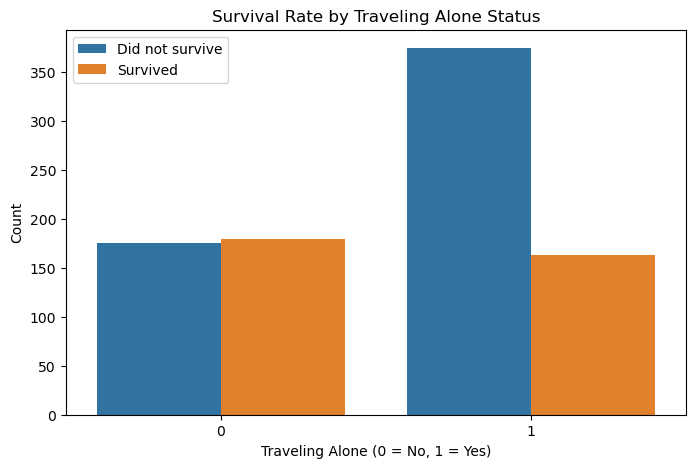

Survival rate by traveling alone status:
IsAlone
0    50.564972
1    30.353818
Name: Survived, dtype: float64

Observation: Passengers traveling with family had a higher survival rate than those traveling alone.
This binary feature simplifies the family size information for the model.


In [13]:
# 2. Create an IsAlone feature
print("Creating new feature: 'IsAlone'")
df_clean['IsAlone'] = (df_clean['FamilySize'] == 1).astype(int)

# Visualize survival rate by IsAlone
plt.figure(figsize=(8, 5))
sns.countplot(x='IsAlone', hue='Survived', data=df_clean)
plt.title('Survival Rate by Traveling Alone Status')
plt.xlabel('Traveling Alone (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend(['Did not survive', 'Survived'])
plt.show()

# Calculate survival rate by IsAlone
alone_survival = df_clean.groupby('IsAlone')['Survived'].mean()
print("Survival rate by traveling alone status:")
print(alone_survival * 100)

print("\nObservation: Passengers traveling with family had a higher survival rate than those traveling alone.")
print("This binary feature simplifies the family size information for the model.")

In [14]:
# 3. Extract titles from passenger names  
print("Extracting titles from passenger names...")  
df_clean['Title'] = df_clean['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)  

# Display the different titles and their frequencies  
title_counts = df_clean['Title'].value_counts()  
print("Titles extracted from names:")  
print(title_counts)  

# Group rare titles to prevent overfitting  
print("\nGrouping rare titles...")  
title_mapping = {  
    "Mr": "Mr",  
    "Miss": "Miss",  
    "Mrs": "Mrs",  
    "Master": "Master",  
    "Dr": "Rare",  
    "Rev": "Rare",  
    "Col": "Rare",  
    "Major": "Rare",  
    "Mlle": "Miss",  # Mademoiselle in French  
    "Mme": "Mrs",    # Madame in French  
    "Ms": "Miss",  
    "Lady": "Rare",  
    "Sir": "Rare",  
    "Capt": "Rare",  
    "Countess": "Rare",  
    "Jonkheer": "Rare",  
    "Don": "Rare",  
    "Dona": "Rare"  
}  
df_clean['Title'] = df_clean['Title'].map(title_mapping)  

# Check the grouped titles  
print("\nTitles after grouping:")  
print(df_clean['Title'].value_counts())  

# Visualize survival rate by title  
plt

Extracting titles from passenger names...
Titles extracted from names:
Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

Grouping rare titles...

Titles after grouping:
Title
Mr        517
Miss      185
Mrs       126
Master     40
Rare       23
Name: count, dtype: int64


<module 'matplotlib.pyplot' from 'C:\\Users\\dsnat\\anaconda3\\envs\\ml_lab\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [15]:
from sklearn.preprocessing import OneHotEncoder

# Encode 'Sex' and 'Embarked' using one-hot encoding
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_sex_embarked = encoder.fit_transform(df[['Sex', 'Embarked']])
encoded_df = pd.DataFrame(
    encoded_sex_embarked,
    columns=encoder.get_feature_names_out(['Sex', 'Embarked'])
)

# Remove the original columns and add the encoded columns
df.drop(columns=['Sex', 'Embarked'], inplace=True)
df = pd.concat([df, encoded_df], axis=1)

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_features = ['Age', 'Fare']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [17]:
features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']
target = 'Survived'

X = df[features]
y = df[target]

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (712, 8)
Testing set shape: (179, 8)


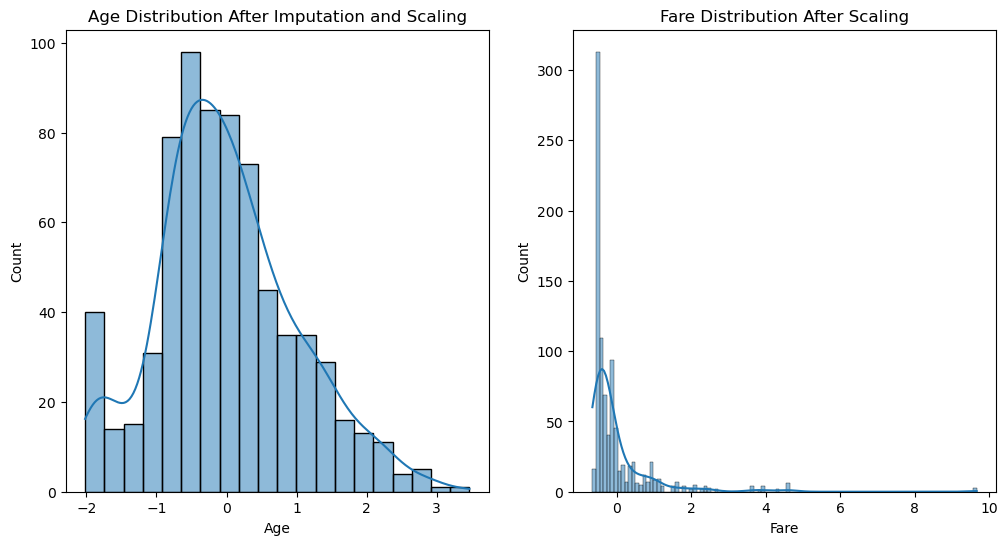

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(df['Age'], kde=True, ax=ax[0])
ax[0].set_title('Age Distribution After Imputation and Scaling')

sns.histplot(df['Fare'], kde=True, ax=ax[1])
ax[1].set_title('Fare Distribution After Scaling')

plt.show()